In [17]:
import numpy as np
import matplotlib.pyplot as plt
import icf
xd, yd = icf.load_2col("Second_data.csv")


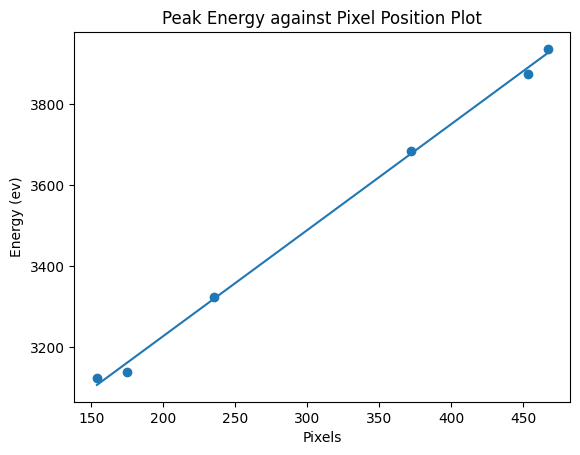

2.6161790950524413


In [30]:
peak_energies = [3123.4,3139.3,3322.9,3683.7,3874.4,3935.6]
peam_x_positions = [154,175,235,372,453,467]
coe = np.polyfit(peam_x_positions,peak_energies,deg=1)
f = np.poly1d(f)
plt.scatter(peam_x_positions,peak_energies)
plt.plot(peam_x_positions,f(peam_x_positions))
plt.title("Peak Energy against Pixel Position Plot")
plt.ylabel("Energy (ev)")
plt.xlabel("Pixels")
plt.show()
print(coe[0])

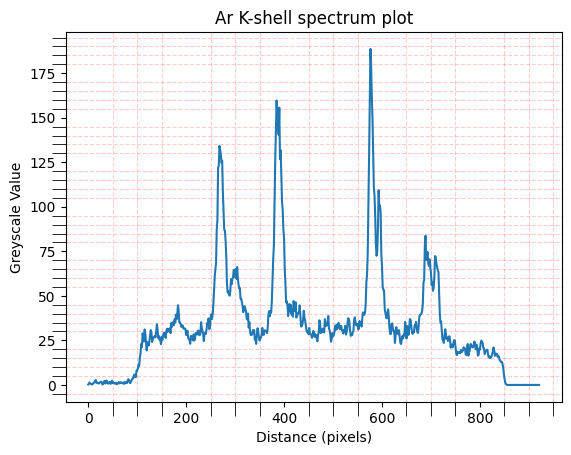

In [15]:
plt.plot(xd,yd)
plt.title("Ar K-shell spectrum plot")
plt.xlabel("Distance (pixels)")
plt.ylabel("Greyscale Value")
plt.grid(True, linestyle='--', color='red', alpha=0.2, which='minor')
plt.minorticks_on()
plt.tick_params(which='minor', length=10)
plt.show()